In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans 
import sklearn.datasets as ds
from sklearn.pipeline import Pipeline
import plotly
from sklearn.decomposition import PCA
from subprocess import check_output
import gzip
import os

from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

plotly.offline.init_notebook_mode()

In [2]:
%matplotlib inline

In [3]:
print(check_output(["ls", "../MNIST_data/fashion_csv/"]).decode("utf8"))
train_file = gzip.GzipFile("../MNIST_data/fashion_csv/fashion-mnist_train.csv.tar.gz", "r")
with open("../MNIST_data/fashion_csv/fashion-mnist_train.csv", 'wb') as f:
    f.write(train_file.read())
train = pd.read_csv('../MNIST_data/fashion_csv/fashion-mnist_train.csv')
train = train.drop(index=len(train.iloc[:, 0])-1) # 不知为什么, 最后一行全为nan, 因此删去末行.
os.remove('../MNIST_data/fashion_csv/fashion-mnist_train.csv')
test = pd.read_csv('../MNIST_data/fashion_csv/fashion-mnist_test.csv')

fashion-mnist_test.csv
fashion-mnist_train.csv.tar.gz



In [4]:
X_train = train.iloc[:,1:].values
Y_train = train.iloc[:,0].values
X_test = test.iloc[:,1:].values

In [5]:
# define some utility function for the rest of the notebook
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_train[indices][:25], title, y[indices])
        
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats
        
def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)
    
def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

def plot_pca_3d(points, out):
    scatter = {
        'mode':"markers",
        'name': "y",
        'type': "scatter3d",    
        'x': points[:,0], 
        'y': points[:,1], 
        'z': points[:,2],
        'marker': {'size':2, 'color':out, 'colorscale':'Rainbow'}
    }
    fig = {'data':[scatter], 'layout': {'title':"Digits 3 principal components"}}
    py.iplot(fig)

In [6]:
n=100000
n_digits=10
X = X_train[0:n, :]
Y = Y_train[0:n]

In [7]:
import plotly.offline as py

# PCA 2D Visualisation of the data
pca = PCA(n_components=3)
pca_input = X[:1000,:]
X_pca = pca.fit(pca_input).transform(pca_input)
Y_pca = Y[:1000]

plot_pca_3d(X_pca, Y_pca)

Plotting an extract of the 10 clusters, overall purity: 0.553167


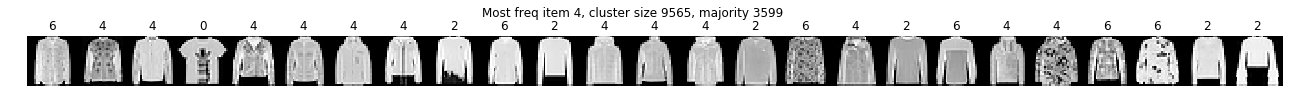

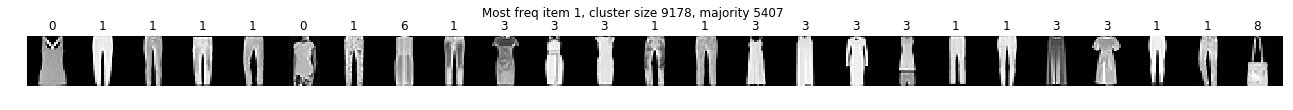

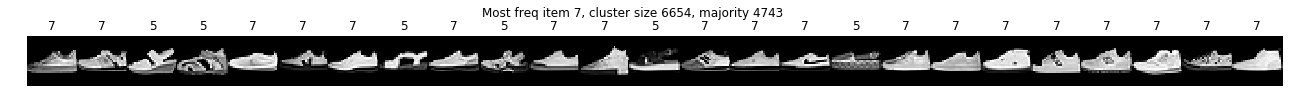

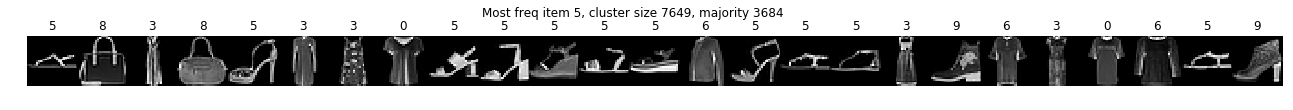

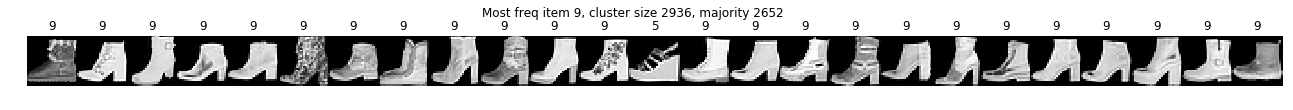

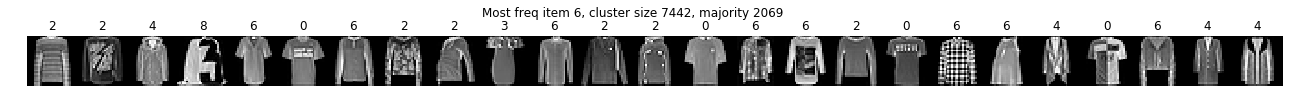

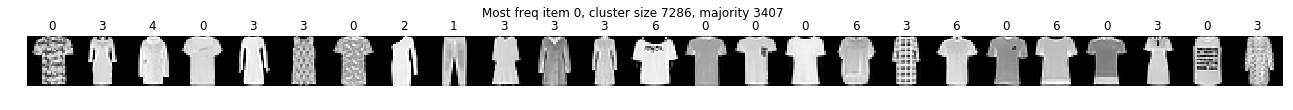

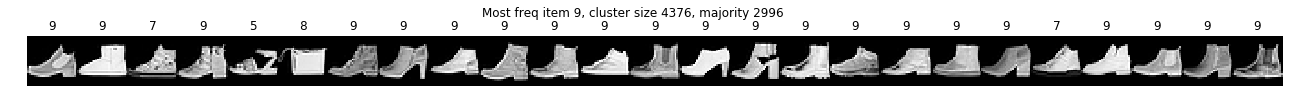

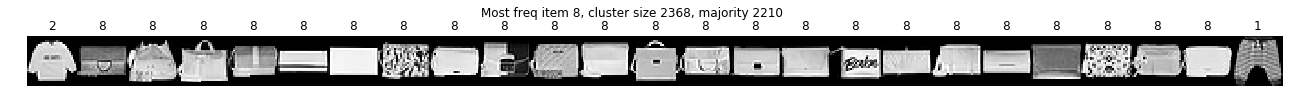

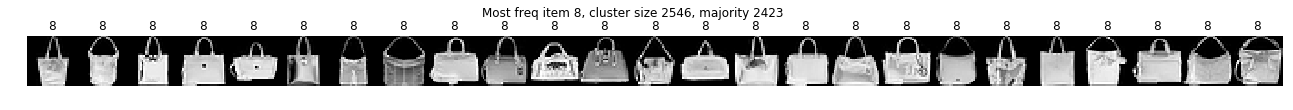

In [8]:
inputs = X[:n,:]

pca = PCA(n_components=n_digits)
kmeans = KMeans(n_clusters=n_digits,n_init=1)
predictor = Pipeline([('pca', pca), ('kmeans', kmeans)])

predict = predictor.fit(inputs).predict(inputs)

stats = clusters_stats(predict, Y)
purity = clusters_purity(stats)

print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)

plot_clusters(predict, Y, stats)